# Introduction

The Fokker-Planck operator in OSHUN is fully non-linear for $f_0^0$ and linearized for $f_l^m$. The $f_l^m$ operator contains the effect of electron-ion collisions. Here, we validate the code by reproducing the heat-flow coefficient for heat-flow perpendicular to the magnetic field, $\kappa_\perp$, for various Z over a long gradient-scale-length. This offers a robust test of the $f_0, f_1$ equation set and its Fokker-Planck operator over a collisional time-scale.

To calculate the heat flow coefficient, $\kappa_\perp$ for various ionization states, Z, and magnetic field strengths, a sinusoidal temperature profile is initialized. The simulations use one spatial direction, $\hat x$, and the magnetic field points in the $\hat z$ direction. The implicit electric field solver, and the implicit collision operators described in the Appendix, enable time-steps on the order of collision-times. Only one term in the spherical harmonic expansion is used (and required). $\kappa_\perp(Z)$ is calculated by dividing the gradient of the temperature by the heat flow, $q = (2/3) \pi \sum v^5 f_1^0 dv$. For the 1D cases studied here, $\kappa_\perp(Z)$, is in the $\hat x$ direction which is perpendicular to the applied magnetic field. We examine $\kappa_x(Z)=\kappa_\perp(Z)$ even when there is no magnetic field.

### Import necessary modules for postprocessing

In [2]:
%matplotlib inline
from IPython import display
from IPython.display import HTML

import sys
import time

import numpy as np
from matplotlib import pyplot as plt

import h5py
import oshunroutines as oshun
import heatflowroutines as heatflow
import re

### Define some plotting routines

_directory_ is the directory containing the output

_Z_ is the ionization state


In [3]:
def get_kappa_sim_theo(directory, total_steps=200, start_steps=1):
    nu_ei = np.mean(heatflow.pullcompoundData(directory,'nuei', 0)[-1])
    time, axes, kappa, _ = heatflow.getcompoundxt(directory,'kappa',np.array(range(start_steps, total_steps)))
    time, axes, kappaEH, _ = heatflow.getcompoundxt(directory,'kappaEH',np.array(range(start_steps, total_steps)))
    colltime = time * nu_ei
    return time, colltime, kappa, kappaEH
    
    
def plot_kappa(Z, *args, **kwargs):
    time, colltime, kappa, kappaEH = get_kappa_sim_theo(*args, **kwargs)
#     plt.rc('font', size=16)
    fig, ax1 = plt.subplots()
    ax2 = ax1.twiny()
    ax1.plot(time, kappa, time, kappaEH, '--')
#     ax1.plot()
    ax1.set_xlabel('Time ($\omega_0^{-1}$)')
    ax2.plot(colltime, kappa)
    ax2.set_xlabel(r'Time ($\nu_{ei}^{-1}$)', wrap=False)
    ax1.set_ylabel('$\kappa_\perp^c (nT\tau_{ei}/m_e)$')
#     ax2.cla()
    
    ax1.legend(['OSHUN', 'E-H, Z='+str(Z)])
    ax1.grid()
    plt.show()

## Simulation setup

For the following simulations, $n_0 = 10^{21} / \text{cm}^3, 
v_\text{th} = 0.07$ $c$. A sinusoidal temperature profile is imposed with $\Delta T / T_0 = 0.01$. The relevant collisional parameters such as the mean free path and collision frequency are found using the NRL formulary. A uniform profile of immobile ions provides a neutralizing background.

Some care must be taken when discretizing the grids. When modeling such plasmas in OSHUN using the implicit field solver, one still needs to resolve the collision time, and to some extent, the collisional mean-free-path. In problems such as these, it is typically more intuitive to work in collisional units where the velocity is normalized by the thermal velocity, space normalized by the collisional mean-free-path, and time normalized by the collision time, i.e. $v_n = v/v_{th}, x_n = x/\lambda_{ei},t_n = t/\tau_{ei}$. 

Using this description, the gradient scale length can be quantified by $T/\nabla T = 1000 \lambda_{ei}$. A shallow temperature gradient ensures heat flow remains local. Since the collisional mean-free-path varies by $Z$, the size of the simulation domain is scaled to preserve the specified gradient scale length.

### Run the Z=2 case

The output has been provided in directory _Z2_. You can skipped this cell and look at the prepared results.

In [10]:
!mkdir Z2 && \cp -f inputdeck.z2 Z2/inputdeck && cd Z2 && ln ../oshun.e . && mpirun -np 16 ./oshun.e inputdeck

	Unloading the conflicting module 'intel/13.cs'


The 'gcc/4.9.3' module is being loaded

	These modules were already loaded: ATS intel/17.0.1 idl/8.1 soxr/0.1.0 ffmpeg/1.1.1

	Unloading the conflicting module 'hdf5/1.8.18-shared'


Initializing parallel environment ...
Initializing parallel environment ...     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...
Initializing parallel environment ...     done 

     done 

     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...     done 


Initializing para

## Plotting Fig. 3 (a)

Let's plot heat-flow coefficient in an unmagnetized plasma as a function of time (blue solid line) for the Z=2 run. The dashed orange line corresponds to the steady-state value computed by Epperlein and Haines [Epperlein et. al., Phys. Fluids, **29**, 1029 (1986)].

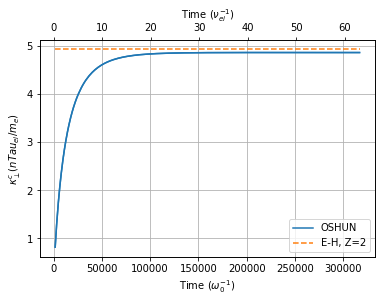

In [9]:
plot_kappa(2, './Z2')

### Run the Z=60 case

The output has been provided in directory _Z60_. You can skipped this cell and look at the prepared results.

In [25]:
!mkdir Z60 && \cp -f inputdeck.Z60t Z60/inputdeck && cd Z60 && ln -s ../oshun.e . && mpirun -np 16 ./oshun.e inputdeck

	Unloading the conflicting module 'intel/13.cs'


The 'gcc/4.9.3' module is being loaded

	These modules were already loaded: ATS intel/17.0.1 idl/8.1 soxr/0.1.0 ffmpeg/1.1.1

	Unloading the conflicting module 'hdf5/1.8.18-shared'


Initializing parallel environment ...
Initializing parallel environment ...     done 

     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...
Initializing parallel environment ...     done 

     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...
Initializing parallel environment ...
Initializing parallel environment ...     done 

     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...     done 

     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...     done 


Initializing para


 dt = 50 , Output #132
 dt = 50 , Output #133 
 Big Dist Output #134
 
 Dist Output #134

 dt = 50 , Output #134
 dt = 50 , Output #135 
 Big Dist Output #136

 dt = 50 , Output #136
 dt = 50 , Output #137 
 Big Dist Output #138
 
 Dist Output #138

 dt = 50 , Output #138
 dt = 50 , Output #139 
 Big Dist Output #140

 dt = 50 , Output #140
 dt = 50 , Output #141 
 Big Dist Output #142
 
 Dist Output #142

 dt = 50 , Output #142
 dt = 50 , Output #143 
 Big Dist Output #144

 dt = 50 , Output #144
 dt = 50 , Output #145 
 Big Dist Output #146
 
 Dist Output #146

 dt = 50 , Output #146 
 Restart Output #147

 dt = 50 , Output #147 
 Big Dist Output #148

 dt = 50 , Output #148
 dt = 50 , Output #149 
 Big Dist Output #150
 
 Dist Output #150

 dt = 50 , Output #150
 dt = 50 , Output #151 
 Big Dist Output #152

 dt = 50 , Output #152
 dt = 50 , Output #153 
 Big Dist Output #154
 
 Dist Output #154

 dt = 50 , Output #154
 dt = 50 , Output #155 
 Big Dist Output #156

 dt = 50 , Outpu

## Plotting Fig. 3 (b)

The blue solid line below shows the evolution of the heat-flow coefficient in an unmagnetized plasma. The dashed orange line the steady-state value computed by Epperlein and Haines [Epperlein et. al., Phys. Fluids, **29**, 1029 (1986)].

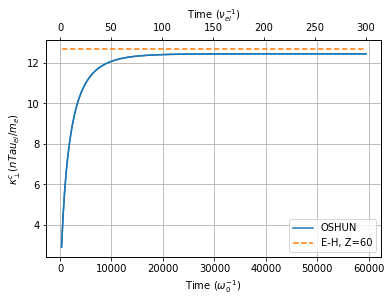

In [4]:
plot_kappa(60, './Z60')

## The importance of including all terms in the $f_l^m$ collision operator for low Z simulations

Simulations with $Z \lesssim 20$ require the full electron-electron collision operator (details in next paragraph) for greater accuracy. When the terms that form a tri-diagonal matrix in the collision operator are used (e.g., when $Z \gtrsim 20$), time-steps on the order of the collision time are possible. To recover the transport coefficient within $3\%$ for $Z \lesssim 20$, the terms describing the Rosenbluth potentials of $f_1^{0,1}$ are necessary.

The linearized $f_l^m$ collision operator is reproduced in
\begin{align}
\begin{split}
\frac{1}{Y_{ee}} \left(\frac{\delta f_l^m}{\delta t}\right) &= (8\pi f_0^0) f_l^m + \frac{(I_2 + J_{-1})}{3v} \frac{\partial^2 f_l^m}{\partial v^2} \\
&+ \frac{(- I_2 + 2 J_{-1} + 3 I_0)}{3v^2} \frac{\partial f_l^m}{\partial v} \\
&- \frac{l(l+1)}{2}\frac{(- I_2 + 2 J_{-1} + 3 I_0) + Y_{ei}/Y_{ee}}{3v^3} f_l^m \\
&+ \left[A_1 \frac{1}{2v} \frac{\partial^2 f_0^0}{\partial v^2} + B_1 \frac{1}{v^2} \frac{\partial f_0^0}{\partial v}\right] I_{l+2}(f_l^m)  \\
&+ \left[A_1 \frac{1}{2v} \frac{\partial^2 f_0^0}{\partial v^2} + B_2 \frac{1}{v^2} \frac{\partial f_0^0}{\partial v}\right] J_{-l-1}(f_l^m) \\
&+ \left[A_2 \frac{1}{2v} \frac{\partial^2 f_0^0}{\partial v^2} + B_3 \frac{1}{v^2} \frac{\partial f_0^0}{\partial v}\right] I_{l}(f_l^m) \\
&+ \left[A_2 \frac{1}{2v} \frac{\partial^2 f_0^0}{\partial v^2} + B_4 \frac{1}{v^2} \frac{\partial f_0^0}{\partial v}\right] J_{1-l}(f_l^m). 
\end{split}
\end{align}
where the coefficients $A_1,A_2,B_1,B_2,B_3,B_4$ are provided in Tzoufras et. al. $I_2(v), J_{-1}(v)$, and $I_0(v)$ are the Rosenbluth potentials of $f_0(v)$.

The first four terms of the equation above are proportional to $f_l^m$ or its first or second derivatives. This enables the discretization of the first four terms implicitly, forming a tri-diagonal matrix. The last four terms describe the evolution of $f_l^m$ due to the interaction of it's own Rosenbluth potentials with $f_0$. Including these terms gives a dense matrix that is more computationally expensive to solve. It is recommended to include these terms as a check for low Z calculations where the off-diagonal terms describing electron-electron collisions have non-negligible contributions. In practice, we find that the tri-diagonal terms recover most calculations within $5-10\%$ as long as the discretization is carefully considered.

The following cell will run 8 simulations, which will take a while. Here we are using $N_v$ values ($N_v=64$) lower than recommended for faster run time. Increasing $N_v$ would reduce the errors and get closer to the theoretical results.

In [29]:
!mkdir z2 && cp inputdeck.z2 ./z2/inputdeck && cd z2 && ln -s ../oshun.e . && mpirun -np 16 ./oshun.e inputdeck

!mkdir z2t && cp inputdeck.z2-tri ./z2t/inputdeck && cd z2t && ln -s ../oshun.e . && mpirun -np 16 ./oshun.e inputdeck

!mkdir z20t && cp inputdeck.z20-tri ./z20t/inputdeck && cd z20t && ln -s ../oshun.e . && mpirun -np 16 ./oshun.e inputdeck

!mkdir z20 && cp inputdeck.z20 ./z20/inputdeck && cd z20 && ln -s ../oshun.e . && mpirun -np 16 ./oshun.e inputdeck

!mkdir z40 && cp inputdeck.z40 ./z40/inputdeck && cd z40 && ln -s ../oshun.e . && mpirun -np 16 ./oshun.e inputdeck

!mkdir z40t && cp inputdeck.z40-tri ./z40t/inputdeck && cd z40t && ln -s ../oshun.e . && mpirun -np 16 ./oshun.e inputdeck

!mkdir z60 && cp inputdeck.z40 ./z60/inputdeck && cd z60 && ln -s ../oshun.e . && mpirun -np 16 ./oshun.e inputdeck

!mkdir z60t && cp inputdeck.z60-tri ./z60t/inputdeck && cd z60t && ln -s ../oshun.e . && mpirun -np 16 ./oshun.e inputdeck


	Unloading the conflicting module 'intel/13.cs'


The 'gcc/4.9.3' module is being loaded

	These modules were already loaded: ATS intel/17.0.1 idl/8.1 soxr/0.1.0 ffmpeg/1.1.1

	Unloading the conflicting module 'hdf5/1.8.18-shared'


Initializing parallel environment ...
Initializing parallel environment ...     done 

     done 


Initializing parallel environment ...
Initializing parallel environment ...     done 


Initializing parallel environment ...
Initializing parallel environment ...     done 


Initializing parallel environment ...
Initializing parallel environment ...     done 

     done 

     done 

     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...     done 


Initializing parallel environment ...
Initializing parallel environment ...     done 

     done 


Initializing para


 dt = 50 , Output #132
 dt = 50 , Output #133 
 Big Dist Output #134
 
 Dist Output #134

 dt = 50 , Output #134
 dt = 50 , Output #135 
 Big Dist Output #136

 dt = 50 , Output #136
 dt = 50 , Output #137 
 Big Dist Output #138
 
 Dist Output #138

 dt = 50 , Output #138
 dt = 50 , Output #139 
 Big Dist Output #140

 dt = 50 , Output #140
 dt = 50 , Output #141 
 Big Dist Output #142
 
 Dist Output #142

 dt = 50 , Output #142
 dt = 50 , Output #143 
 Big Dist Output #144

 dt = 50 , Output #144
 dt = 50 , Output #145 
 Big Dist Output #146
 
 Dist Output #146

 dt = 50 , Output #146 
 Restart Output #147

 dt = 50 , Output #147 
 Big Dist Output #148

 dt = 50 , Output #148
 dt = 50 , Output #149 
 Big Dist Output #150
 
 Dist Output #150

 dt = 50 , Output #150
 dt = 50 , Output #151 
 Big Dist Output #152

 dt = 50 , Output #152
 dt = 50 , Output #153 
 Big Dist Output #154
 
 Dist Output #154

 dt = 50 , Output #154
 dt = 50 , Output #155 
 Big Dist Output #156

 dt = 50 , Outpu


 dt = 75 , Output #62 
 Dist Output #63

 dt = 75 , Output #63 
 Big Dist Output #64

 dt = 75 , Output #64
 dt = 75 , Output #65 
 Big Dist Output #66

 dt = 75 , Output #66 
 Dist Output #67

 dt = 75 , Output #67 
 Big Dist Output #68

 dt = 75 , Output #68
 dt = 75 , Output #69 
 Big Dist Output #70

 dt = 75 , Output #70 
 Dist Output #71

 dt = 75 , Output #71 
 Big Dist Output #72

 dt = 75 , Output #72
 dt = 75 , Output #73 
 Restart Output #74
 
 Big Dist Output #74

 dt = 75 , Output #74 
 Dist Output #75

 dt = 75 , Output #75 
 Big Dist Output #76

 dt = 75 , Output #76
 dt = 75 , Output #77 
 Big Dist Output #78

 dt = 75 , Output #78 
 Dist Output #79

 dt = 75 , Output #79 
 Big Dist Output #80

 dt = 75 , Output #80
 dt = 75 , Output #81 
 Big Dist Output #82

 dt = 75 , Output #82 
 Dist Output #83

 dt = 75 , Output #83 
 Big Dist Output #84

 dt = 75 , Output #84
 dt = 75 , Output #85 
 Big Dist Output #86

 dt = 75 , Output #86 
 Dist Output #87

 dt = 75 , Output 


 dt = 50 , Output #1 
 Big Dist Output #2

 dt = 50 , Output #2
 dt = 50 , Output #3 
 Dist Output #4
 
 Big Dist Output #4

 dt = 50 , Output #4
 dt = 50 , Output #5 
 Big Dist Output #6

 dt = 50 , Output #6
 dt = 50 , Output #7 
 Dist Output #8
 
 Big Dist Output #8

 dt = 50 , Output #8
 dt = 50 , Output #9 
 Big Dist Output #10

 dt = 50 , Output #10
 dt = 50 , Output #11 
 Dist Output #12
 
 Big Dist Output #12

 dt = 50 , Output #12
 dt = 50 , Output #13 
 Big Dist Output #14

 dt = 50 , Output #14
 dt = 50 , Output #15 
 Dist Output #16
 
 Big Dist Output #16

 dt = 50 , Output #16
 dt = 50 , Output #17 
 Big Dist Output #18

 dt = 50 , Output #18 
 Restart Output #19

 dt = 50 , Output #19 
 Dist Output #20
 
 Big Dist Output #20

 dt = 50 , Output #20
 dt = 50 , Output #21 
 Big Dist Output #22

 dt = 50 , Output #22
 dt = 50 , Output #23 
 Dist Output #24
 
 Big Dist Output #24

 dt = 50 , Output #24
 dt = 50 , Output #25 
 Big Dist Output #26

 dt = 50 , Output #26
 dt = 5

## Obtain the theory and simulation heat-flow coefficient for different ionization state

We use the heat-flow coefficient obtained from the last output from each simulation as the simulation results. 

In [10]:
timez2, colltimez2, kappaz2, kappaEHz2 = get_kappa_sim_theo('./z2', start_steps=199)
timez2t, colltimez2t, kappaz2t, kappaEHz2t = get_kappa_sim_theo('./z2t', start_steps=199)

timez20, colltimez20, kappaz20, kappaEHz20 = get_kappa_sim_theo('./z20', start_steps=199)
timez20t, colltimez20t, kappaz20t, kappaEHz20t = get_kappa_sim_theo('./z20t', start_steps=199)

timez40, colltimez40, kappaz40, kappaEHz40 = get_kappa_sim_theo('./z40', start_steps=199)
timez40t, colltimez40t, kappaz40t, kappaEHz40t = get_kappa_sim_theo('./z40t', start_steps=199)

timez60, colltimez60, kappaz60, kappaEHz60 = get_kappa_sim_theo('./z60', start_steps=199)
timez60t, colltimez60t, kappaz60t, kappaEHz60t = get_kappa_sim_theo('./z60t', start_steps=199)


zlist = range(1, 70)
kappa_theo = [heatflow.getKappaEH([0],[z])[0][0] for z in zlist]

sim_zlist = [2, 2, 20, 20, 40, 40, 60, 60]
kappa_sim = [kappaz2t[-1], kappaz2[-1], kappaz20t[-1], kappaz20[-1], kappaz40t[-1], kappaz40[-1], kappaz60t[-1], kappaz60[-1]]

### Plotting the heat-flow coefficients for simulations and theory

The first plot shows the heat flow coefficient after 10 ps in a millimeter plasma for various ionization states.

The second plot shows the relative differences between the theory and simulation results. Since we are using suboptimal $N_v$ value in these simulations, the differences are larger than they should be. If we use better resolution in momentum space ($N_v=256$ for example), both simulation results (with and without keeping all $f_l^m$ terms) would get closer to the theroy.

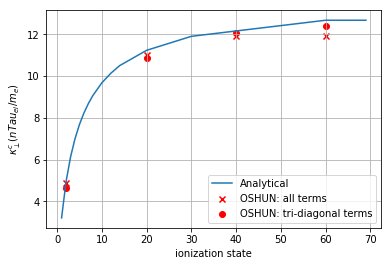

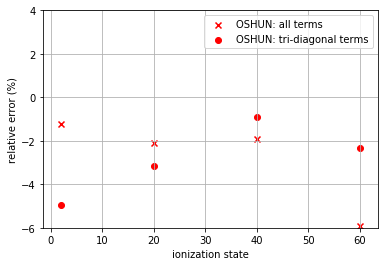

In [11]:
plt.plot(zlist, kappa_theo, label='Analytical')
plt.scatter(sim_zlist[1::2], kappa_sim[1::2], marker='x', color='red', label='OSHUN: all terms')
plt.scatter(sim_zlist[::2], kappa_sim[::2], marker='o', color='red', label='OSHUN: tri-diagonal terms')
plt.xlabel('ionization state')
plt.ylabel('$\kappa_\perp^c (nT\tau_{ei}/m_e)$')
plt.grid()
plt.legend()

err = [100*(ks-kappa_theo[z-1])/kappa_theo[z] for z, ks in zip(sim_zlist, kappa_sim)]
plt.figure()
plt.scatter(sim_zlist[1::2], err[1::2], marker='x', color='red', label='OSHUN: all terms')
plt.scatter(sim_zlist[::2], err[::2], marker='o', color='red', label='OSHUN: tri-diagonal terms')
plt.xlabel('ionization state')
plt.ylabel('relative error (%)')
plt.ylim([-6, 4])
plt.grid()
plt.legend()

===========================================================================================

## Heat-flow coefficient for different magnetizations

Now we perform similar simulations in the presence of a constant external magnetic field in the $\hat{z}$ direction. OSHUN has the ability to impose an external magnetic field in the system. Using this feature, the plasma is held at the desired level of magnetization. 

The gyrofrequency has to be resolved in these simulations, meaning the time-step must be reduced as the magnetization ($\omega\tau$) increases.

Again we use the heat-flow coefficient obtained from the last output from each simulation as the simulation results. 

The following figure shows excellent agreement between the results from \textsc{oshun} and the calculation in Epperlein and Haines over a range of magnetizations, $\omega_c\tau_{ei} = 0.01,0.06,0.1,0.6,1,3$ for both Z=2 and Z=60. Here, $\omega_c$ is the gyrofrequency and $\tau_{ei}$ is the electron-ion collision frequency. 

In [8]:
def get_Qx_sim(directory, total_steps=200, start_steps=1):
    nu_ei = np.mean(heatflow.pullcompoundData(directory,'nuei', 0)[-1])  
    simtime, realtime, axes, data_Qx = heatflow.pullData(directory,'Qx',0)
    time, Qx = [], []
    for ti in range(start_steps, total_steps):
        simtime, realtime, axes, data_Qx = heatflow.pullData(directory,'Qx',ti)
        time.append(simtime)
        Qx.append(np.max(data_Qx))
    time, Qx = np.array(time), np.array(Qx) 
    colltime = time * nu_ei
    return time, colltime, Qx
    
    
def plot_qx(Z, dir1, dir2, **kwargs):
    time, colltime, Qx1 = get_Qx_sim(dir1, **kwargs)
    time, colltime, Qx2 = get_Qx_sim(dir2, **kwargs)
    plt.plot(colltime, Qx1, colltime, Qx2)
    plt.ylabel('max($Q_x$)')
    plt.xlabel(r'Time ($\nu_{ei}^{-1}$)')
    plt.grid()
    plt.title('Z=' + str(Z))
#     plt.legend(['All terms', 'Tri-diagonal terms'])

#     plt.rc('font', size=16)
#     fig, ax1 = plt.subplots()
#     ax2 = ax1.twiny()
#     ax1.plot(time, Qx1)
# #     ax1.plot()
#     ax1.set_xlabel('Time ($\omega_0^{-1}$)')
#     ax2.plot(colltime, Qx2)
#     ax2.set_xlabel(r'Time ($\nu_{ei}^{-1}$)', wrap=False)
#     ax1.set_ylabel(')
# #     ax2.cla()
    
#     
#     ax1.grid()
    plt.show()

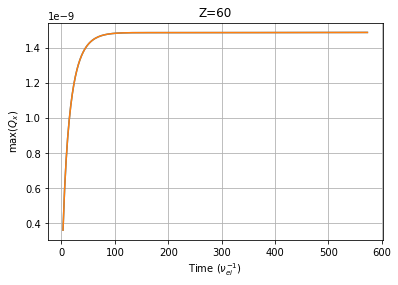

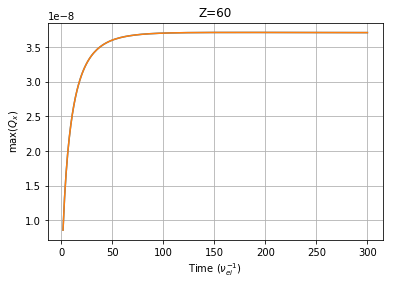

In [54]:
plot_qx(60, './', './')
plt.figure()
plot_qx(60, './Z60', './Z60')

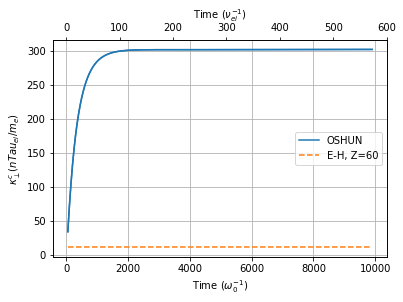

In [51]:
plot_kappa(60, './')

In [41]:
time, axes, kappa, _ = heatflow.getcompoundxt('./','kappaEH',np.array(range(1, 200)))
kappa

array([ 10.950819  ,  10.95080688,  10.95079475,  10.95078243,
        10.95077017,  10.95075776,  10.95074545,  10.950733  ,
        10.95072066,  10.95070818,  10.95069582,  10.95068333,
        10.95067096,  10.95065847,  10.95064609,  10.95063359,
        10.95062121,  10.95060871,  10.95059633,  10.95058383,
        10.95057145,  10.95055895,  10.95054658,  10.95053407,
        10.9505217 ,  10.9505092 ,  10.95049683,  10.95048433,
        10.95047196,  10.95045946,  10.95044709,  10.95043459,
        10.95042222,  10.95040973,  10.95039736,  10.95038487,
        10.95037251,  10.95036002,  10.95034765,  10.95033516,
        10.9503228 ,  10.95031031,  10.95029795,  10.95028546,
        10.9502731 ,  10.95026061,  10.95024825,  10.95023577,
        10.95022341,  10.95021092,  10.95019857,  10.95018608,
        10.95017373,  10.95016125,  10.95014889,  10.95013641,
        10.95012405,  10.95011157,  10.95009922,  10.95008674,
        10.95007439,  10.95006191,  10.95004956,  10.95